In [21]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [22]:
def pathMaker(model, optim, size,boolean):
    return "model%swithOptimoo%s-epochs10-batch-size%s-relational-batch%s.csv" % (model, optim, size,boolean)

In [23]:
results = {}
models = ["mlp"]#, "resnet"]
optims = ["SGD","adagrad", "adam"]
bools = ["False", "True"]
sizes = ["1", "8", "32", "128"]


dirAbrv = {
                "Adult_Income":    "ACI         ", 
                "compas":          "compas      ", 
                "Dont_Get_Kicked": "DGK         ", 
                "Forest_Cover":    "Forest Cover", 
                "KDD99":           "KDD99       ", 
                "Usedcarscatalog": "Used Cars   "}

curve = dict()
for directory in dirAbrv.keys():
    curve[directory] = dict()
    for model in models:
        curve[directory][model] = dict()
        for optim in optims:
            curve[directory][model][optim] = dict()
            for b in bools:
                curve[directory][model][optim][b] = dict()
    

print(optims)
for size in sizes:
    print("\nsize: " + size)
    for model in models:
        print("\nmodel: " + model)
        for dir in os.listdir("results"):
            if not(".png"  in dir):
                results["dir"] = dict()
                path = "results/" + dir
                files = os.listdir(path)

                losses = {}
                printing = "\\textbf{" + dirAbrv[dir] + "} & "
                for optim in optims:
                    txts = {}
                    maxis = {}
                    minis = {}
                    for b in bools:
                        p = pathMaker(model,optim,size,b)
                        if p in files:
                            df = pd.read_csv(path + "/" + p)

                            name = "noRB"
                            if b == "True":
                                name = "RB"
                            losses["%s with %s" % (optim, name)] = df.test

                            std = np.std(df.test)
                            meanTest = np.mean(df.test)

                            curve[dir][model][optim][b][size] = meanTest
                            # print("model:%s optim:%s rb:%s: %2.2f +- %2.2f" % (model, optim, b, meanTest, std))

                            _maxi = meanTest + std
                            _mini = meanTest - std - 0.01

                            txt = "%2.2f $\pm$ %2.2f" % (meanTest, std)
                            txts[str(b)] = txt
                            maxis[str(b)] = _maxi
                            minis[str(b)] = _mini
                    for b in bools:

                            txt = txts[str(b)]
                            if maxis[str(b)] < minis[str(not b)]:
                                txt = "\\textbf{" + txt + "}"
                            printing = printing + txt+ " & "
                            # print(txt)
                printing = printing[:-2] + "\\\\"
                printing = printing.replace("0.00", "0.01")
                # print(printing)
                    

['SGD', 'adagrad', 'adam']

size: 1

model: mlp

size: 8

model: mlp

size: 32

model: mlp

size: 128

model: mlp


In [24]:
x = np.log([1,8,32,128])

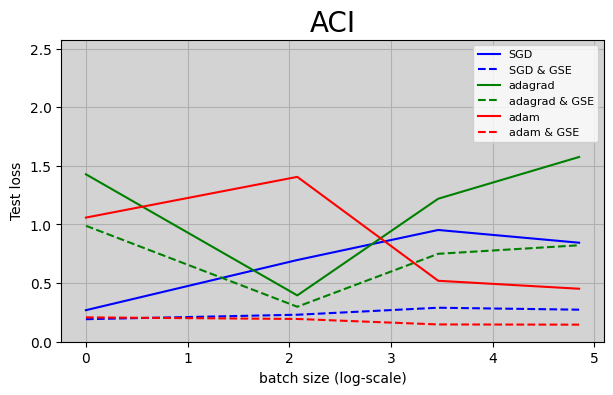

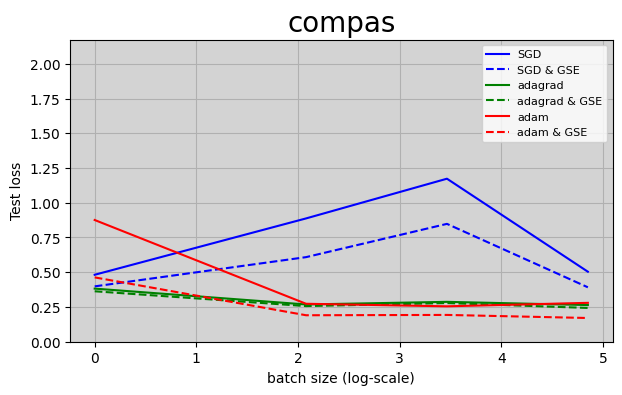

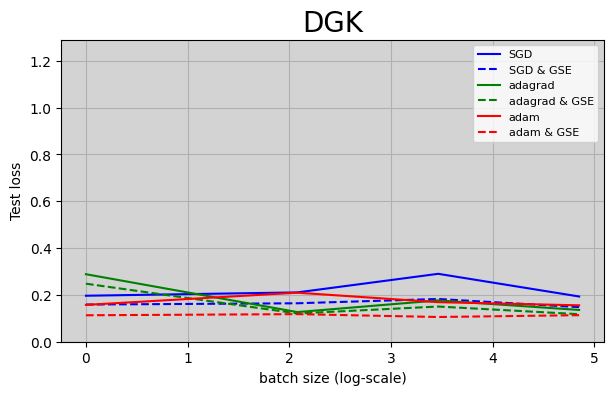

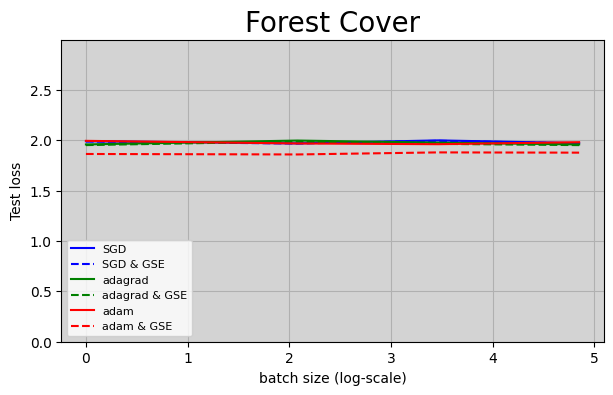

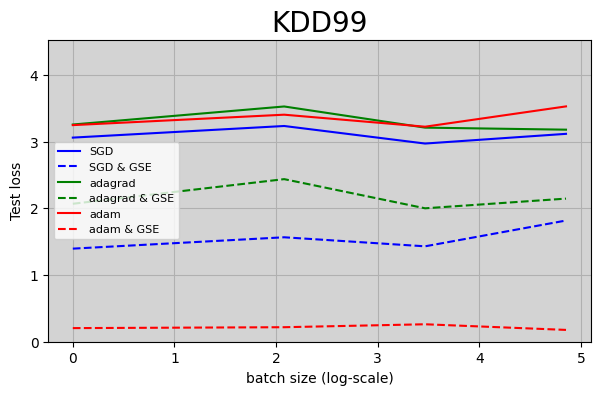

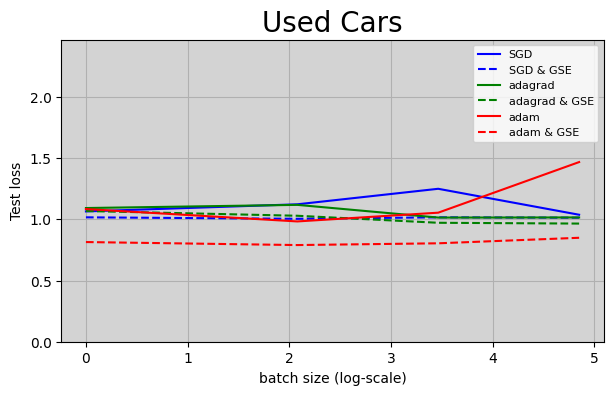

In [26]:
colors = list(mcolors.BASE_COLORS.keys())
for d in curve.keys():
    plt.figure(figsize=(7, 4), dpi=100)
    ax = plt.axes()
    ax.set_facecolor('lightgray')
    maxi = 0
    for i in range(len(models)):
        model = models[i]

        for j in range(len(optims)):
            optim = optims[j]
            color = colors[j]
            for b in bools:
                y = [curve[d][model][optim][b][a] for a in sizes] 
                linestyle = "solid"
                label = optim
                if b == "True":
                    linestyle = "dashed"
                    label += " & GSE"
                maxi = max(maxi, max(y)) 
                plt.plot(x, y, linestyle=linestyle, color=color, label=label)
    plt.ylim(0,maxi + 1)
    plt.xlabel("batch size (log-scale)")
    plt.ylabel("Test loss")
    plt.grid()
    plt.legend(fontsize=8)
    title = dirAbrv[d].strip()
    plt.title(title, size=20)
    plt.savefig("results/" +d+"lossResults.png")
    plt.show()
    plt.close()